## Importo las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
from seaborn import set_style
set_style('darkgrid')

##  Las empresas consideradas son
* Texas Instruments Inc. empresas es una empresa estadounidense con sede en Dallas que desarrolla y comercializa semiconductores y tecnología para computadoras. Ticker: $TXN$
* Oracle Corporation es una compañía especializada en el desarrollo de soluciones de nube y locales. Ticker: $ORCL$
* NetApp, Inc. es una empresa estadounidense de servicios de datos en la nube híbrida y empresa de gestión de datos. Ticker $NTAP$

In [60]:
empresas = ['TXN', 'ORCL', 'NTAP']
portfolio = pd.DataFrame()
for i in empresas:
    portfolio[i] = web.DataReader(i, 'yahoo', '2018-04-30', '2020-10-01')['Adj Close']
#portfolio = portfolio.round(2)
print(portfolio.head())

                  TXN       ORCL       NTAP
Date                                       
2018-04-30  94.610840  43.779190  61.406803
2018-05-01  96.448387  44.047611  62.578129
2018-05-02  96.037971  43.625813  62.163094
2018-05-03  96.634941  43.194450  61.969402
2018-05-04  98.239586  43.817543  62.725689


In [61]:
portfolio['Cartera'] = (portfolio.TXN+portfolio.NTAP+portfolio.ORCL)*100
portfolio.head(10)

,TXN,ORCL,NTAP,Cartera
Date,,,,
2018-04-30,94.610840,43.779190,61.406803,19979.683304
2018-05-01,96.448387,44.047611,62.578129,20307.412720
2018-05-02,96.037971,43.625813,62.163094,20182.687759
2018-05-03,96.634941,43.194450,61.969402,20179.879379
2018-05-04,98.239586,43.817543,62.725689,20478.281784
2018-05-07,98.070686,44.162636,63.491196,20572.451782
2018-05-08,98.962143,44.038017,64.219833,20721.999359
2018-05-09,100.913979,44.651520,65.640152,21120.565033
2018-05-10,103.194252,44.987030,66.248878,21443.016052


Se selecionaron los precios $"Adj Close"$ desde el 30 de Abril del 2018 hasta el primero de Ocubre del 2020. <br>
Se aclara que la variable cartera esta suma de los precios multiplicada por 100 (suponemos tener **100 acciones de cadauna**). 

### Reordenamos los valores en modo ascendente despues de haber hecho la diferecia del dia siguiente con el dia anterior. De este vector ponemos un menos delante. 
* Trabajamos segun $L_{t+1}$ := $L_{[t\Delta,(t+1)\Delta]}$ = $-(V_{t+1}-V)$

In [62]:
loss = (-(portfolio.Cartera-portfolio.Cartera.shift(1)).fillna(0)).sort_values(ascending=True).values

In [63]:
portfolio['Loss'] = loss
portfolio.head(10)

,TXN,ORCL,NTAP,Cartera,Loss
Date,,,,,
2018-04-30,94.610840,43.779190,61.406803,19979.683304,-2113.819504
2018-05-01,96.448387,44.047611,62.578129,20307.412720,-1853.425598
2018-05-02,96.037971,43.625813,62.163094,20182.687759,-1755.757523
2018-05-03,96.634941,43.194450,61.969402,20179.879379,-1325.453568
2018-05-04,98.239586,43.817543,62.725689,20478.281784,-1312.360001
2018-05-07,98.070686,44.162636,63.491196,20572.451782,-1302.280807
2018-05-08,98.962143,44.038017,64.219833,20721.999359,-960.657501
2018-05-09,100.913979,44.651520,65.640152,21120.565033,-923.598862
2018-05-10,103.194252,44.987030,66.248878,21443.016052,-899.998093


In [71]:
print('Estadisticos de la loss:\n')
print(sps.describe(loss))
print('Mediana:', np.median(loss))
print('Suma de la Loss: ', sum(loss))

Estadisticos de la loss:

DescribeResult(nobs=612, minmax=(-2113.8195037841797, 1822.540283203125), mean=-7.676598916645923, variance=159444.52664380067, skewness=0.056010539066890096, kurtosis=4.268989216308156)
Mediana: -22.408103942871094
Suma de la Loss:  -4698.078536987305


## Dibujamos la Cumulative distribution Function and Density function de la Loss

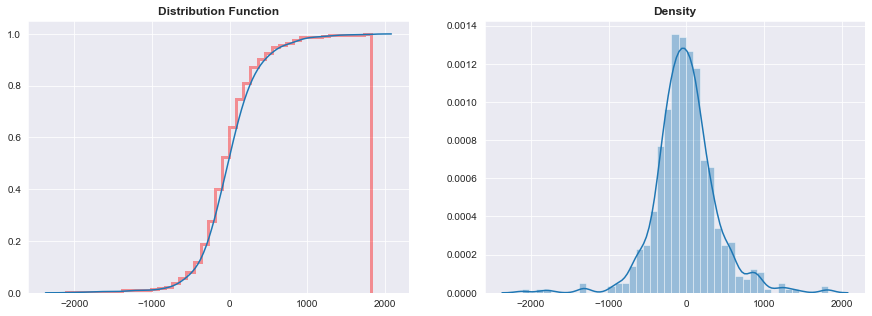

In [28]:
kwargs = {'cumulative':True}
plt.figure(figsize=(15, 5))
wq = plt.subplot(1,2,1)
plt.title('Distribution Function', fontweight='bold')
sns.distplot(loss, hist_kws={'histtype': 'step','linewidth':3,
                                'cumulative':True, 'color':'red'}, kde_kws=kwargs,
                 label='Loss Historical')
wp = plt.subplot(1,2,2)
plt.title('Density', fontweight='bold')
sns.distplot(loss, hist=True, bins='fd')
plt.show()

# La funciòn de Distribuciòn y el Value-at-Risk de Loss

In [29]:
fn = np.repeat(1/len(loss), len(loss))
prueba = pd.Series(fn).cumsum()
prueba.tail(10)

602    0.985294
603    0.986928
604    0.988562
605    0.990196
606    0.991830
607    0.993464
608    0.995098
609    0.996732
610    0.998366
611    1.000000
dtype: float64

In [32]:
print('The VaR at 99% (percentile) is:', np.percentile(prueba, 99))
print('The Value-at-Risk is: ', round(loss[605],2))
print('The TVaR is: ', round(sum(loss[605:])/len(loss[605:]), 2))

The VaR at 99% (percentile) is: 0.9900163398692778
The Value-at-Risk is:  1193.0
The TVaR is:  1443.71


## Las semplicidad y eficiencia de Python ademas nos permite pasarle una funciòn y obtener una serie de resultados en cuestion segundos.

### En concreto los parametros de la funcion seràn 4:
* El primero hace referencia a la empresa, el $ticker$ de la misma nos permitirà descargar los datos desde yahoofinance
* El segundo y el tercer parametros son la fecha de inicio y fin de nuestro analisis
* El cuarto el Valor de nuestra inversiòn. 

Los resultados en detalle son algunos descriptivos, los **plots** de la distribuciòn logaritmica (Asumiendo que esta sigue una distribuciòn teorica conocida y otro plot no parametrica), los **VaR** y **CVaR** de nuestra inversiòn y por ultimo el modelo de volatilidad condicional, porque como se muestra es poco plausible la hipotesis de $"normalidad"$. <br> De hecho parace que la t-Student es una mejor opcion como muestra el grafico.

----------------------------------------------------------------------
----------------------------------------------------------------------
Estadisticos descriptivo de la Loss
Media:  -0.0256
Mediana:  -0.0691
Varianza:  0.8596
Asimetria:  -0.6214
Curtosis:  14.1203
MinMax:  (-8.025001525878906, 5.1427154541015625)
Observaciones:  611
Loss VaR (percentil): -2.42
Date
2020-03-13   -8.025002
2020-03-26   -4.481365
2019-06-20   -4.199684
2020-03-17   -4.086529
2020-03-24   -3.602863
Name: Adj Close, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


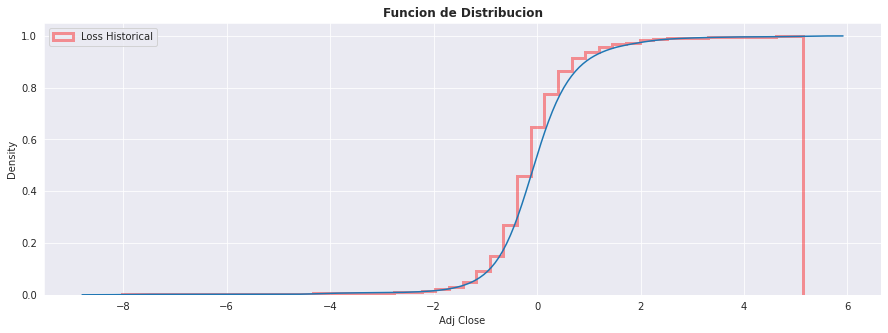

----------------------------------------------------------------------
Estadisticos de la distribucion logaritmica
Observaciones:  611
Media:  0.0005
Varianza:  0.0004
Asimetria:  0.8234
Curtosis:  20.2034
----------------------------------------------------------------------
Normality Tests:

Jarque_Bera test for normality based on K and skew: 0.0
D'Agostino normal test: 5.383139681384619e-49
----------------------------------------------------------------------
----------------------------------------------------------------------
Percentage Values of VaRs
99% 1-day Student t VaR = -3.895%
99% 1-day Normal VaR    = -4.455%
----------------------------------------------------------------------
----------------------------------------------------------------------
Monetary amount of Loss according to Normal VaR given 10000 dollares:
 
435.73
----------------------------------------------------------------------
Monetary amount of Loss according to t-Student VaR given 10000 bucks:
 
381

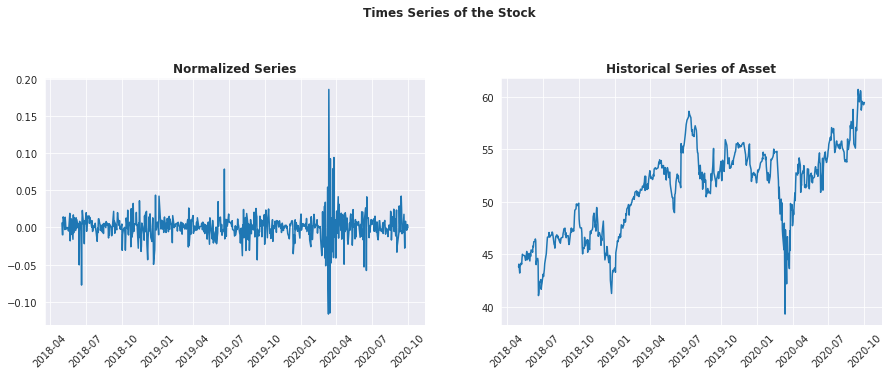

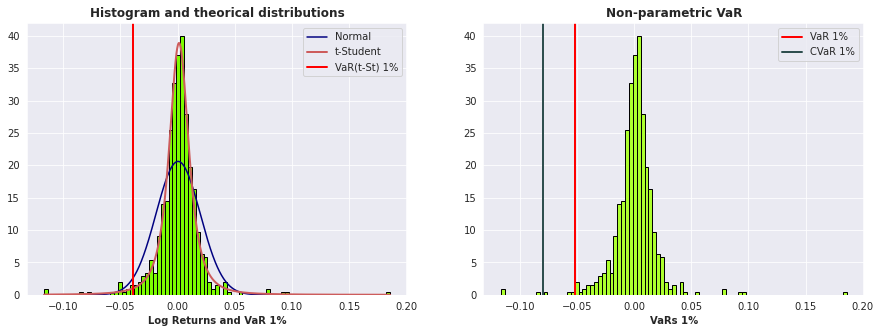

                              AR - GARCH Model Results                              
Dep. Variable:                    Adj Close   R-squared:                       0.043
Mean Model:                              AR   Adj. R-squared:                  0.041
Vol Model:                            GARCH   Log-Likelihood:               -1043.22
Distribution:      Standardized Student's t   AIC:                           2098.44
Method:                  Maximum Likelihood   BIC:                           2124.92
                                              No. Observations:                  610
Date:                      Tue, Oct 27 2020   Df Residuals:                      604
Time:                              23:17:15   Df Model:                            6
                                 Mean Model                                 
                   coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

In [5]:
riesgos('ORCL', start='2018-04-30', end='2020-10-01', investment=10000)

----------------------------------------------------------------------
----------------------------------------------------------------------
Estadisticos descriptivo de la Loss
Media:  -0.0823
Mediana:  -0.1859
Varianza:  5.6015
Asimetria:  0.1674
Curtosis:  4.0917
MinMax:  (-12.466102600097656, 12.357704162597656)
Observaciones:  611
Loss VaR (percentil): -6.766
Date
2020-03-17   -12.466103
2020-04-06    -8.849442
2019-07-24    -8.620331
2020-03-26    -8.474968
2020-03-13    -8.386292
Name: Adj Close, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


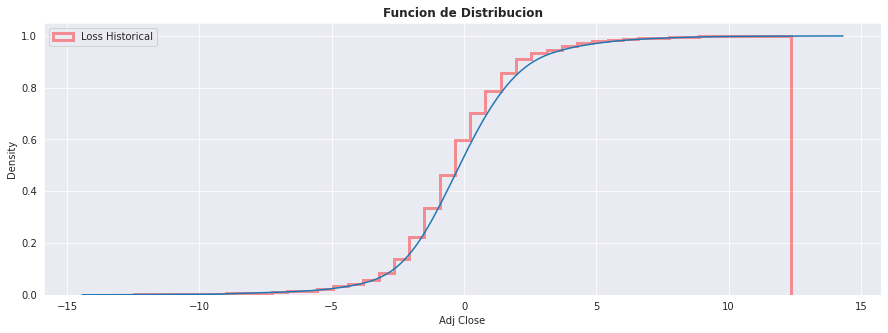

----------------------------------------------------------------------
Estadisticos de la distribucion logaritmica
Observaciones:  611
Media:  0.0007
Varianza:  0.0005
Asimetria:  -0.1351
Curtosis:  5.4381
----------------------------------------------------------------------
Normality Tests:

Jarque_Bera test for normality based on K and skew: 0.0
D'Agostino normal test: 1.829374392294457e-18
----------------------------------------------------------------------
----------------------------------------------------------------------
Percentage Values of VaRs
99% 1-day Student t VaR = -5.716%
99% 1-day Normal VaR    = -5.049%
----------------------------------------------------------------------
----------------------------------------------------------------------
Monetary amount of Loss according to Normal VaR given 10000 dollares:
 
492.37
----------------------------------------------------------------------
Monetary amount of Loss according to t-Student VaR given 10000 bucks:
 
555

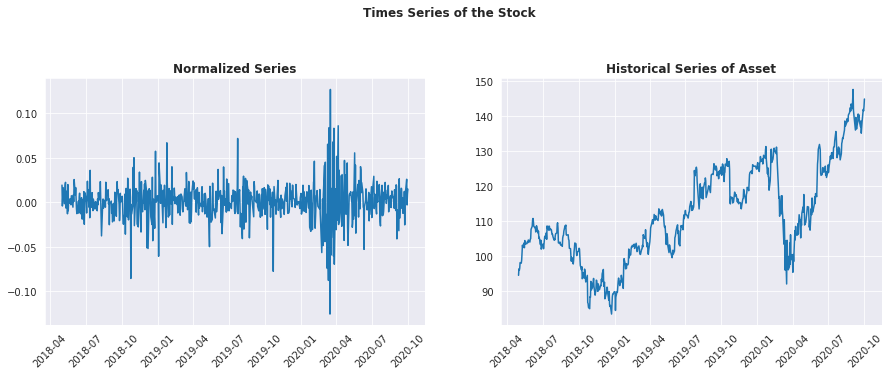

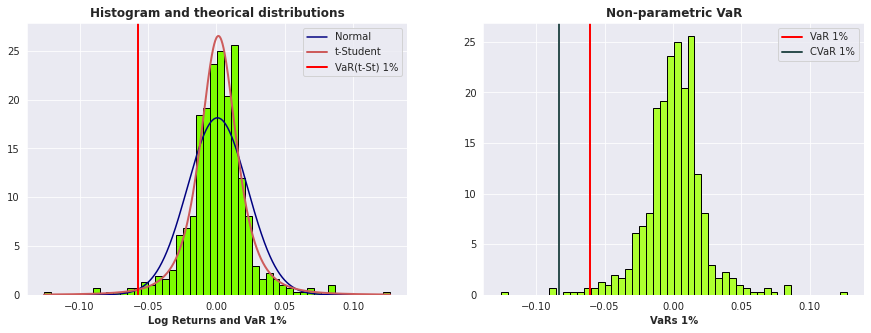

                              AR - GARCH Model Results                              
Dep. Variable:                    Adj Close   R-squared:                       0.069
Mean Model:                              AR   Adj. R-squared:                  0.067
Vol Model:                            GARCH   Log-Likelihood:               -1221.10
Distribution:      Standardized Student's t   AIC:                           2454.20
Method:                  Maximum Likelihood   BIC:                           2480.68
                                              No. Observations:                  610
Date:                      Tue, Oct 27 2020   Df Residuals:                      604
Time:                              23:17:35   Df Model:                            6
                                  Mean Model                                 
                   coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------------------------------------------------------------
C

In [6]:
riesgos('TXN', start='2018-04-30', end='2020-10-01', investment=10000)

----------------------------------------------------------------------
----------------------------------------------------------------------
Estadisticos descriptivo de la Loss
Media:  0.0311
Mediana:  -0.0881
Varianza:  2.0681
Asimetria:  1.3983
Curtosis:  8.0963
MinMax:  (-4.726902008056641, 11.08920669555664)
Observaciones:  611
Loss VaR (percentil): -2.83
Date
2020-03-13   -4.726902
2020-03-26   -4.601242
2018-10-30   -4.331215
2020-03-10   -3.508930
2018-12-03   -2.850220
Name: Adj Close, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


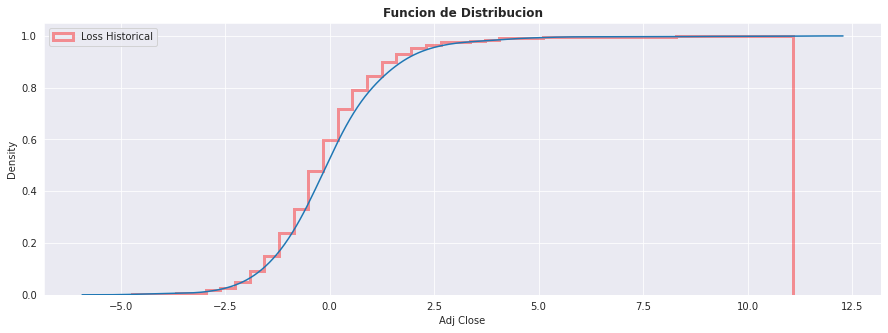

----------------------------------------------------------------------
Estadisticos de la distribucion logaritmica
Observaciones:  611
Media:  -0.0006
Varianza:  0.0008
Asimetria:  -1.2311
Curtosis:  9.8582
----------------------------------------------------------------------
Normality Tests:

Jarque_Bera test for normality based on K and skew: 0.0
D'Agostino normal test: 2.945878014618986e-48
----------------------------------------------------------------------
----------------------------------------------------------------------
Percentage Values of VaRs
99% 1-day Student t VaR = -7.382%
99% 1-day Normal VaR    = -6.479%
----------------------------------------------------------------------
----------------------------------------------------------------------
Monetary amount of Loss according to Normal VaR given 10000 dollares:
 
627.38
----------------------------------------------------------------------
Monetary amount of Loss according to t-Student VaR given 10000 bucks:
 
71

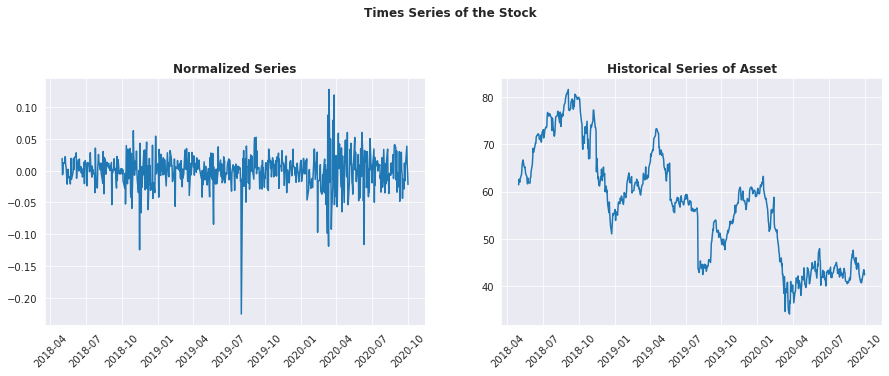

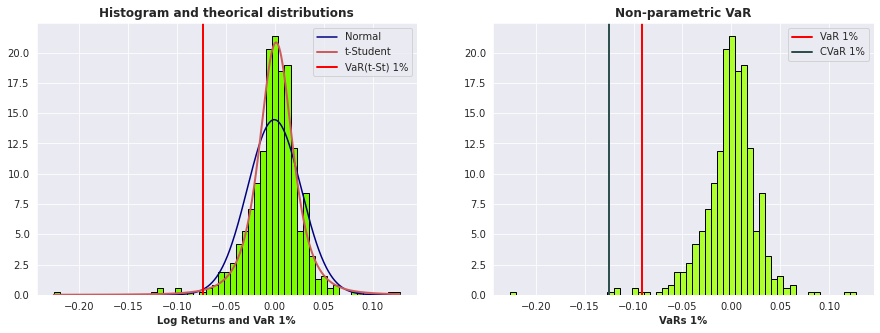

                              AR - GARCH Model Results                              
Dep. Variable:                    Adj Close   R-squared:                       0.002
Mean Model:                              AR   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -1372.14
Distribution:      Standardized Student's t   AIC:                           2756.28
Method:                  Maximum Likelihood   BIC:                           2782.76
                                              No. Observations:                  610
Date:                      Tue, Oct 27 2020   Df Residuals:                      604
Time:                              23:17:45   Df Model:                            6
                                  Mean Model                                 
                   coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------------------------------------------------------------
C

In [7]:
riesgos('NTAP', start='2018-04-30', end='2020-10-01', investment=10000)

In [ ]:
des = sps.describe(loss)
des

DescribeResult(nobs=612, minmax=(-12633482.339477539, 12534530.899047852), mean=-83273.61894183689, variance=5733938051840.832, skewness=0.1663929456222956, kurtosis=4.12222884935555)

# Por ultimo adjunto el codigo para la obtenciòn de dichos resultados

In [2]:
def riesgos(firm: str, start: str, end: str,
            investment: float) -> (str, float, bool):

    import pandas_datareader.data as web
    import scipy.stats as sps
    from seaborn import set_style
    import seaborn as sns
    set_style('darkgrid')

    firm = firm
    c1 = start
    c2 = end
    investment = investment
    f3 = web.DataReader(firm, 'yahoo', c1, c2)['Adj Close']
    f3_log = np.log(f3 / f3.shift(1)).dropna()
    fabso = -(f3-f3.shift(1)).dropna()
    stabso = sps.describe(fabso)
    w1, w2, w3, w4, w5, w6 = sps.describe(f3_log)
    reo = fabso.sort_values(ascending=True)
    cos = round(np.percentile(reo, 1), 3)
    
    bera = sps.jarque_bera(f3_log)
    dago = sps.normaltest(f3_log)
    print('--'*35)
    
    print('--'*35)
    print('Estadisticos descriptivo de la Loss')
    print('Media: ', round(stabso[2], 4))
    print('Mediana: ', round(np.median(fabso), 4))
    print('Varianza: ', round(stabso[3], 4))
    print('Asimetria: ', round(stabso[4], 4))
    print('Curtosis: ', round(stabso[5], 4))
    print('MinMax: ', stabso[1])
    print('Observaciones: ', stabso[0])
    print('Loss VaR (percentil):', cos)
    print(reo.head())

    kwargs = {'cumulative': True}
    plt.figure(figsize=(15,5))
    plt.title('Funcion de Distribucion', fontweight='bold')
    sns.distplot(reo, hist_kws={'histtype': 'step','linewidth':3,
                                'cumulative':True, 'color':'red'}, kde_kws=kwargs,
                 label='Loss Historical')
    plt.legend()
    plt.show()

    print('--'*35)
    print('Estadisticos de la distribucion logaritmica')
    print('Observaciones: ', w1)
    print('Media: ',round(w3, 4))
    print('Varianza: ', round(w4, 4))
    print('Asimetria: ', round(w5, 4))
    print('Curtosis: ', round(w6, 4))
    print('--'*35)
    print('Normality Tests:\n')
    print('Jarque_Bera test for normality based on K and skew:', bera[1])
    print("D'Agostino normal test:", dago.pvalue)
    print('--'*35)
    print('--'*35)

    x = np.linspace(np.min(f3_log), np.max(f3_log), 1000)
    
    from arch.univariate import arch_model

    mu_norm, sig_norm = sps.norm.fit(f3_log)
    zeta = sps.norm.ppf(.01)
    pdf_nor = sps.norm.pdf(x, mu_norm, sig_norm)
    nu, mu_t, sig_t = sps.t.fit(f3_log)
    pdf_t = sps.t.pdf(x, nu, mu_t, sig_t)

    h = 1  # days
    alpha = .01  # significance level
    StudenthVaR = h * mu_norm - (h * (nu - 2) / nu) ** 0.5 * sps.t.ppf(1 - alpha, nu) * sig_norm
    NormalhVaR = h * mu_norm - sps.norm.ppf(1 - alpha) * sig_norm * (h ** 0.5)

    lev = 100 * (1 - alpha)
    print('Percentage Values of VaRs')
    print("%g%% %g-day Student t VaR = %.3f%%" % (lev, h, StudenthVaR * 100))
    print("%g%% %g-day Normal VaR    = %.3f%%" % (lev, h, NormalhVaR * 100))

    print('--'*35)
    print('--'*35)
    print(f'Monetary amount of Loss according to Normal VaR given {investment} dollares:\n ')
    sa = ((1 - np.exp(NormalhVaR)) * investment)
    print(round(sa, 2))
    print('--'*35)
    print(f'Monetary amount of Loss according to t-Student VaR given {investment} bucks:\n ')
    print(round((1 - np.exp(StudenthVaR)) * investment, 2))
    print('--'*35)
    print('--'*35)
    print('Percentage Values of CVaRs')
    z = (1 / alpha * 1 / np.sqrt(2 * np.pi) * np.exp(-.5 * zeta ** 2))  # Normale
    CVaR_normale = mu_norm - sig_norm * z
    print("%g%% %g-day Normal CVaR  = %.3f%%" % (lev, h, CVaR_normale * 100))
    Cvar_t = mu_t + sig_t * sps.t.ppf(.01, nu)
    print("%g%% %g-day t-Student CVaR  = %.3f%%" % (lev, h, Cvar_t * 100))
    CVaR_norm = ((1 - np.exp(CVaR_normale)) * investment)
    print('--'*35)
    print(f'Monetary amount of Loss according to Normal CVaR given {investment} bucks:\n ')
    print(CVaR_norm.round(2))
    print(f'Monetary amount of Loss according to t-Stud CVaR given {investment} bucks:\n ')
    valor = (1 - np.exp(Cvar_t)) * investment
    print(round(valor, 2))
    print('--'*35)
    print('--'*35)

    order = f3_log.sort_values(ascending=True)
    valu = np.percentile(order, 1)
    print('Percentage Values of Historical Value-at-Risk')
    print(f'Percentile value = {round(valu * 100, 3)}%')
    print('--'*35)
    var01 = ((1 - np.exp(valu)) * investment)
    print(f'Historical Value-at-Risk given {investment} bucks:\n'
              f'The VaR for this asset in monetary terms is {round(var01, 2)}')
    
    cvar = (order[order <= valu]).mean()
    print(f'Historical Conditional Value-at-Risk given {investment} bucks:\n'
              f'Percentile value {round(cvar * 100, 2)}%')
    print('--'*35)
    print('Monetary amount of Loss using Historical CVaR for this asset is:')
    money = (1 - np.exp(cvar)) * investment
    print(money.round(2))
    print('--'*35)


        # Graphs
    plt.figure(figsize=(15,10))
    plt.suptitle('Times Series of the Stock', fontweight='bold')
    p0 = plt.subplot(2, 2, 1)
    plt.title('Normalized Series', fontweight='bold')
    p0.plot(f3_log)
    plt.xticks(rotation=45)
    p1 = plt.subplot(2, 2, 2)
    plt.title('Historical Series of Asset', fontweight='bold')
    p1.plot(f3)
    plt.xticks(rotation=45)

    plt.figure(figsize=(15,5))
    p2 = plt.subplot(1, 2, 1)
    plt.title('Histogram and theorical distributions', fontweight='bold')
    p2.hist(f3_log, edgecolor='black', color='lawngreen',
                 bins='fd', density=True)
    p2.plot(x, pdf_nor, label='Normal', color='navy')
    p2.plot(x, pdf_t, label='t-Student', color='indianred', linewidth=2)
    plt.xlabel('Log Returns and VaR 1%', fontweight='bold')
    p2.axvline(StudenthVaR, label='VaR(t-St) 1%', color='red', linewidth=2)
    plt.legend()
    p3 = plt.subplot(1,2,2)
    plt.title('Non-parametric VaR', fontweight='bold')
    plt.xlabel('VaRs 1%', fontweight='bold')
    p3.hist(f3_log, edgecolor='black', color='greenyellow', bins='fd', density=True)
    p3.axvline(valu, label='VaR 1%', color='red', linewidth=2)
    p3.axvline(cvar, label='CVaR 1%', color='darkslategrey', linewidth=2)
    plt.legend()
    plt.show()

    duck = f3_log*100
    fitting = arch_model(duck, p=1, q=1, lags=1,
                             dist='t', mean='ARX', vol='Garch').fit(disp='off')
    model = fitting.summary()
    print(model)
        